In [75]:
import pickle
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
import plotly.express as px

In [64]:
with open(r'../keypoints_desc_0Train.pickle', 'rb') as handle:
    train_set = pickle.load(handle)
with open(r'../keypoints_desc_0Test.pickle', 'rb') as handle:
    test_set = pickle.load(handle)  
train_set.loc[train_set.label !=4, ['label']]=0
train_set.loc[train_set.label ==4, ['label']]=1

test_set.loc[test_set.label !=4, ['label']]=0
test_set.loc[test_set.label ==4, ['label']]=1

In [65]:
test_set

,angle,desc,label,octave,response,size
0,43.373169,"[8.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 9.0, 4.0, ...",0.0,11803907.0,0.001883,34.504063
1,270.028870,"[0.0, 0.0, 0.0, 7.0, 23.0, 0.0, 0.0, 0.0, 13.0...",0.0,11803907.0,0.001883,34.504063
2,260.556763,"[130.0, 94.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13...",0.0,10954496.0,0.000516,5.124422
3,139.605179,"[19.0, 8.0, 8.0, 22.0, 18.0, 3.0, 6.0, 9.0, 14...",1.0,3154433.0,0.002151,9.322314
4,293.928284,"[15.0, 16.0, 12.0, 20.0, 8.0, 4.0, 11.0, 12.0,...",1.0,3154433.0,0.002151,9.322314
...,...,...,...,...,...,...
337254,169.284027,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,11084547.0,0.003246,38.256180
337255,281.157532,"[3.0, 1.0, 2.0, 115.0, 106.0, 0.0, 1.0, 2.0, 5...",1.0,15213314.0,0.003067,19.209864
337256,225.813568,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,3220738.0,0.003339,19.641245
337257,289.954773,"[45.0, 77.0, 47.0, 8.0, 0.0, 0.0, 0.0, 1.0, 14...",1.0,3220738.0,0.003339,19.641245


In [80]:
samples=test_set.sample(n=5000)
samples

,angle,desc,label,octave,response,size
324636,241.064911,"[1.0, 1.0, 15.0, 24.0, 2.0, 0.0, 0.0, 1.0, 1.0...",1.0,12330498.0,0.003152,20.174910
133608,100.357544,"[1.0, 11.0, 26.0, 18.0, 11.0, 5.0, 0.0, 0.0, 1...",1.0,9248772.0,0.005623,72.497452
205666,326.000000,"[1.0, 1.0, 2.0, 2.0, 6.0, 2.0, 0.0, 0.0, 5.0, ...",1.0,7480834.0,0.004445,20.072649
81935,298.916595,"[4.0, 12.0, 69.0, 110.0, 16.0, 9.0, 11.0, 8.0,...",1.0,16132099.0,0.002602,41.935780
211922,269.245697,"[43.0, 4.0, 2.0, 13.0, 24.0, 15.0, 18.0, 35.0,...",1.0,2172162.0,0.003369,19.619831
...,...,...,...,...,...,...
209998,124.855179,"[20.0, 32.0, 9.0, 14.0, 28.0, 16.0, 59.0, 59.0...",1.0,11214851.0,0.002111,36.322933
229563,169.078201,"[25.0, 20.0, 16.0, 48.0, 74.0, 47.0, 23.0, 23....",1.0,15344899.0,0.007613,39.780056
172682,120.515869,"[41.0, 66.0, 20.0, 18.0, 35.0, 9.0, 11.0, 41.0...",1.0,16590083.0,0.002521,39.831310
209179,163.714310,"[21.0, 41.0, 53.0, 60.0, 6.0, 2.0, 3.0, 18.0, ...",1.0,1451010.0,0.002143,19.267836


In [84]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(list(samples.desc.values))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...
[t-SNE] Computed neighbors for 5000 samples in 0.976s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 92.388499
[t-SNE] KL divergence after 100 iterations with early exaggeration: 85.316254
[t-SNE] KL divergence after 900 iterations: 2.621442


In [35]:
samples['tsne-2d-one'] = tsne_results[:,0]
samples['tsne-2d-two'] = tsne_results[:,1]

In [36]:
samples

,angle,desc,label,octave,response,size,tsne-2d-one,tsne-2d-two
151646,325.359497,"[30.0, 115.0, 46.0, 18.0, 4.0, 16.0, 2.0, 1.0,...",0.0,6105092.0,0.001014,83.002686,-4.363909,-2.154832
50210,70.587524,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0,...",1.0,6562563.0,0.002496,38.075550,-3.167057,-4.234280
156190,130.937408,"[74.0, 53.0, 8.0, 34.0, 29.0, 0.0, 2.0, 3.0, 1...",1.0,1910786.0,0.002465,20.661684,1.025076,-1.093153
47865,124.608002,"[13.0, 2.0, 19.0, 12.0, 1.0, 1.0, 79.0, 122.0,...",0.0,11347713.0,0.000917,10.253092,0.800331,1.261481
74178,239.241272,"[2.0, 4.0, 7.0, 56.0, 25.0, 11.0, 8.0, 1.0, 7....",0.0,8200450.0,0.000592,18.420273,3.724318,2.645745
...,...,...,...,...,...,...,...,...
100327,278.303375,"[11.0, 19.0, 33.0, 39.0, 32.0, 7.0, 1.0, 1.0, ...",1.0,10232323.0,0.002913,37.565563,-0.494474,1.309327
186429,156.325821,"[31.0, 91.0, 100.0, 3.0, 8.0, 32.0, 1.0, 1.0, ...",1.0,11872257.0,0.002009,10.437715,0.362577,3.149829
209475,205.230972,"[72.0, 20.0, 4.0, 33.0, 45.0, 0.0, 0.0, 18.0, ...",1.0,5841925.0,0.002502,154.847809,2.601259,-0.409058
328160,140.740829,"[7.0, 1.0, 0.0, 1.0, 3.0, 6.0, 11.0, 10.0, 4.0...",1.0,12263171.0,0.002285,35.737015,0.373620,-3.543727


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

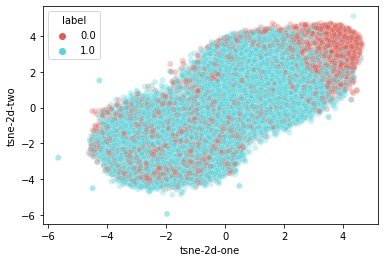

In [37]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 2),
    data=samples,
    legend="full",
    alpha=0.3,
)

2
0 b 0
1 r 1


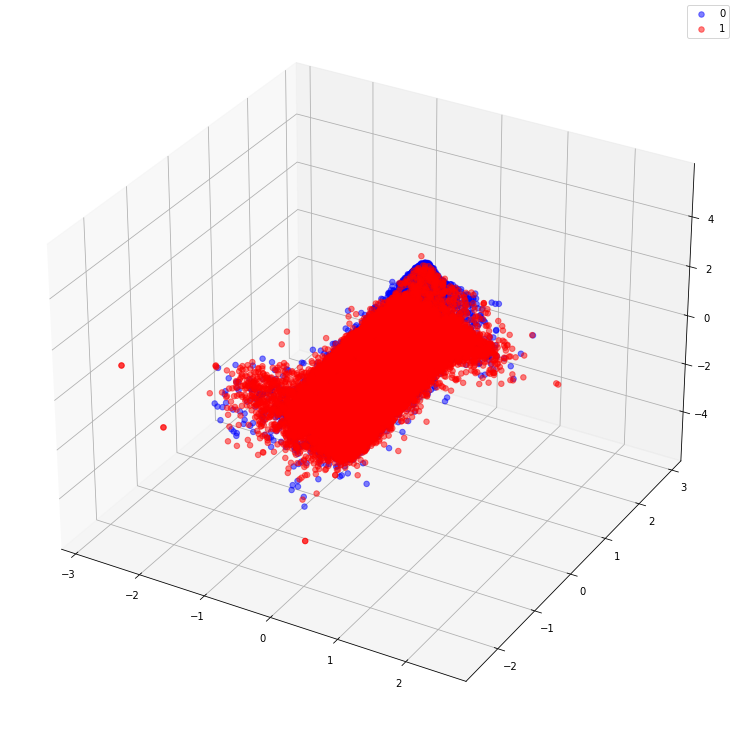

In [60]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
colors = 'b', 'r'
labels = 0, 1
print(len(labels))
for i, c, label in zip(range(len(labels)), colors, labels):
    print(i,c,label)
    ax.scatter(tsne_results[samples['label']==i, 0], tsne_results[samples['label']==i, 1], tsne_results[samples['label']==i, 2], s=30, c=c, label=label, alpha=0.5)
fig.legend()

In [85]:
samples['x'] = tsne_results[:,0]
samples['y'] = tsne_results[:,1]
samples['z'] = tsne_results[:,2]

In [86]:
df = px.data.iris()
fig = px.scatter_3d(samples, x='x', y='y', z='z',
              color='label')
fig.show()